# การสร้างกราฟเส้นหลายเส้นด้วย pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas version: {pd.__version__}')

pandas version: 1.1.3


In [3]:
pd.set_option('display.max_rows', 10)

In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/oil_gold_setindex.csv',
                index_col='Date', parse_dates=True)
df

,Oil,Gold,SET
Date,,,
2003-01-31,30.71,356.859,370.01
2003-02-28,32.63,358.970,361.32
2003-03-31,27.22,340.550,364.55
2003-04-30,23.72,328.180,374.63
2003-05-31,26.71,355.683,403.82
...,...,...,...
2017-12-31,64.47,1264.450,1753.71
2018-01-31,66.28,1331.300,1826.86
2018-02-28,63.97,1330.730,1830.13


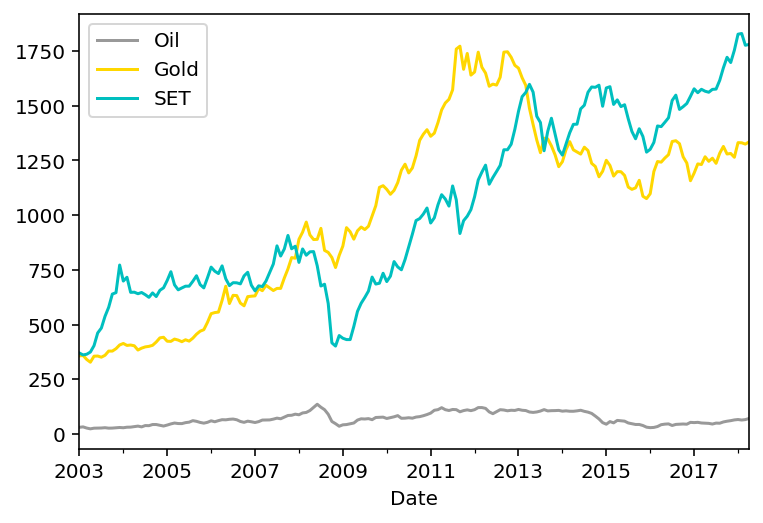

In [5]:
df[['Oil', 'Gold', 'SET']].plot(kind='line', color=['.6', 'gold', 'c']);

## % change from previous period

In [6]:
df['oil_pct_chg']=df['Oil'].pct_change()
df['gold_pct_chg']=df['Gold'].pct_change()
df['set_pct_chg']=df['SET'].pct_change()

In [7]:
df

,Oil,Gold,SET,oil_pct_chg,gold_pct_chg,set_pct_chg
Date,,,,,,
2003-01-31,30.71,356.859,370.01,NaN,NaN,NaN
2003-02-28,32.63,358.970,361.32,0.062520,0.005916,-0.023486
2003-03-31,27.22,340.550,364.55,-0.165798,-0.051313,0.008939
2003-04-30,23.72,328.180,374.63,-0.128582,-0.036324,0.027651
2003-05-31,26.71,355.683,403.82,0.126054,0.083805,0.077917
...,...,...,...,...,...,...
2017-12-31,64.47,1264.450,1753.71,0.055847,-0.013613,0.033180
2018-01-31,66.28,1331.300,1826.86,0.028075,0.052869,0.041712
2018-02-28,63.97,1330.730,1830.13,-0.034852,-0.000428,0.001790


In [8]:
cols=['oil_pct_chg', 'gold_pct_chg', 'set_pct_chg']
color=['.6', 'gold', 'c']

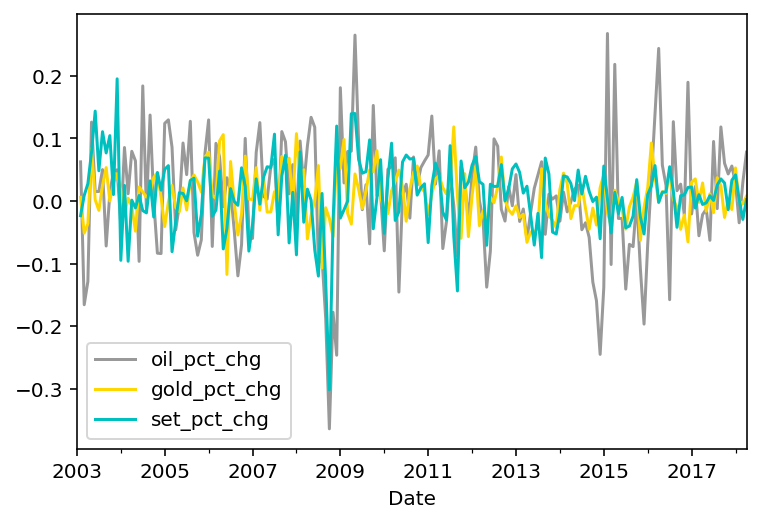

In [9]:
df[cols].plot(kind='line', color=color);

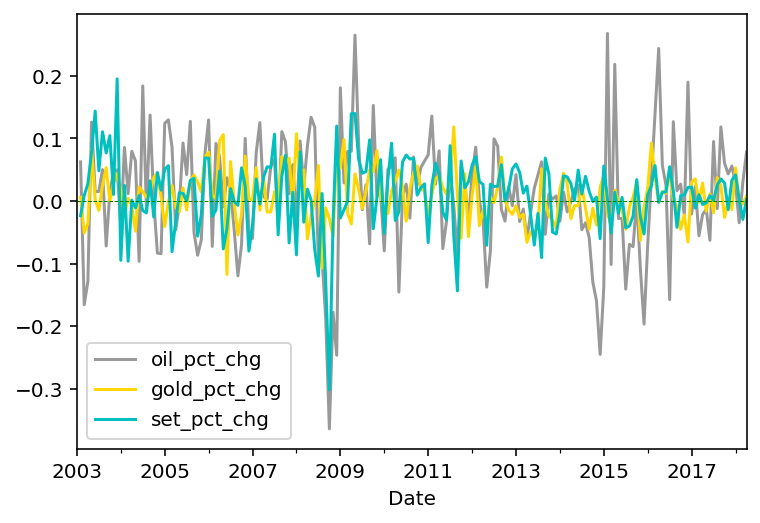

In [23]:
ax=df[cols].plot(kind='line', color=color,)
ax.axhline(0, color="green", linestyle="--", linewidth=.5);

### add horizontal line & set figsize 

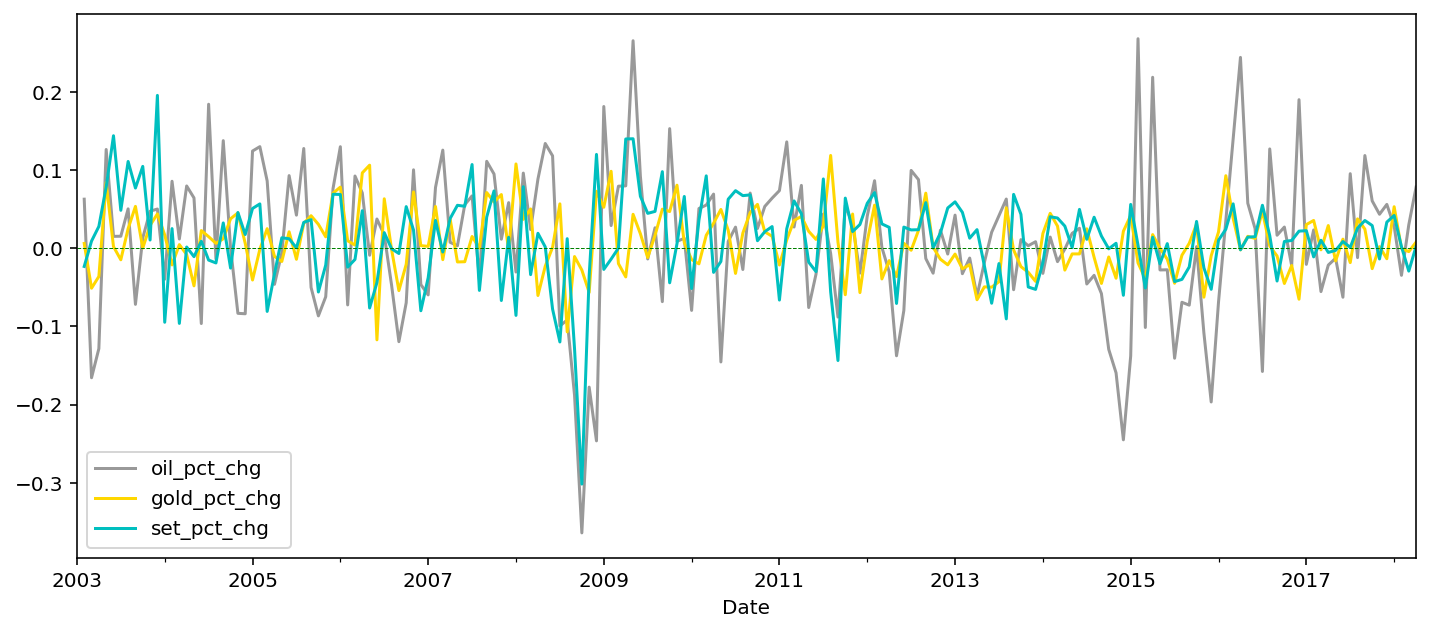

In [11]:
ax=df[cols].plot(kind='line', color=color, figsize=(12,5))
ax.axhline(0, color="green", linestyle="--", linewidth=.5);

### filter data

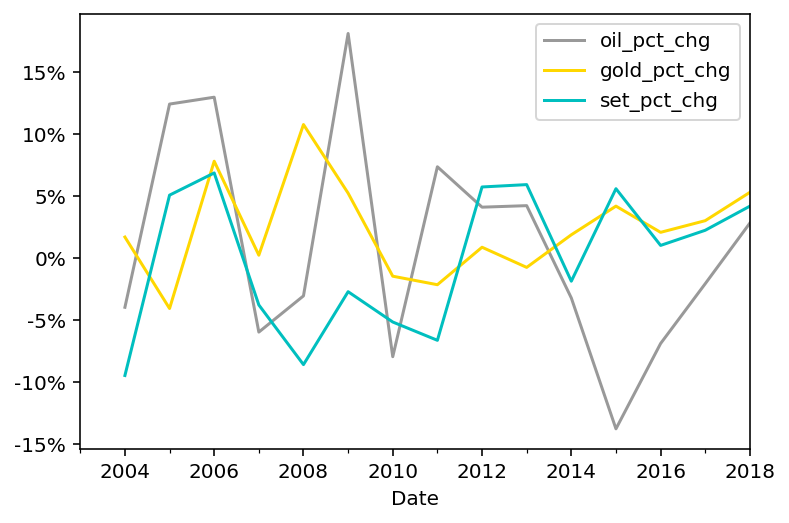

In [30]:
ax=df.loc[::12, cols].plot(kind='line', color=color)
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:.0f}%".format(v * 100)));

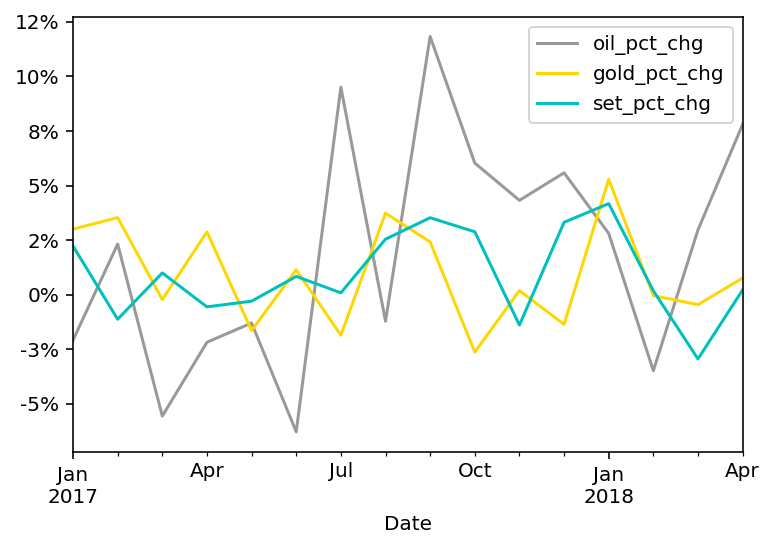

In [13]:
ax=df.loc['2017-01-31':, cols].plot(kind='line', color=color);
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}%".format(v * 100)));

### subplots

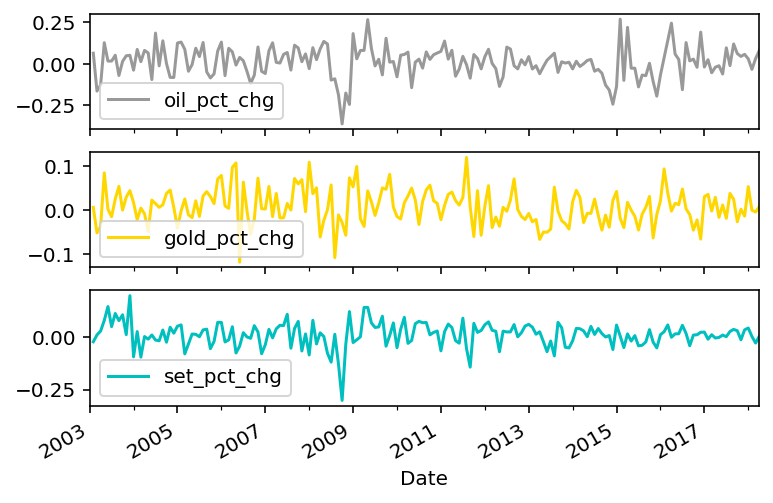

In [14]:
df[cols].plot(kind='line', subplots=True, color=color);

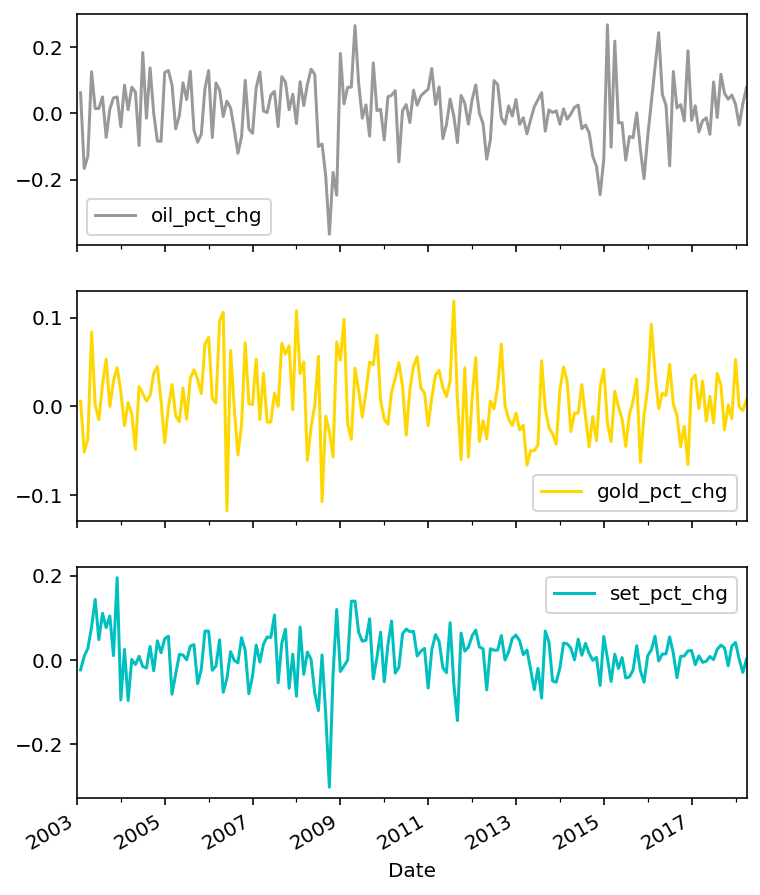

In [15]:
df[['oil_pct_chg', 'gold_pct_chg', 'set_pct_chg']].plot(kind='line', 
                                                        subplots=True, 
                                                        figsize=(6, 8),
                                                        color=color);

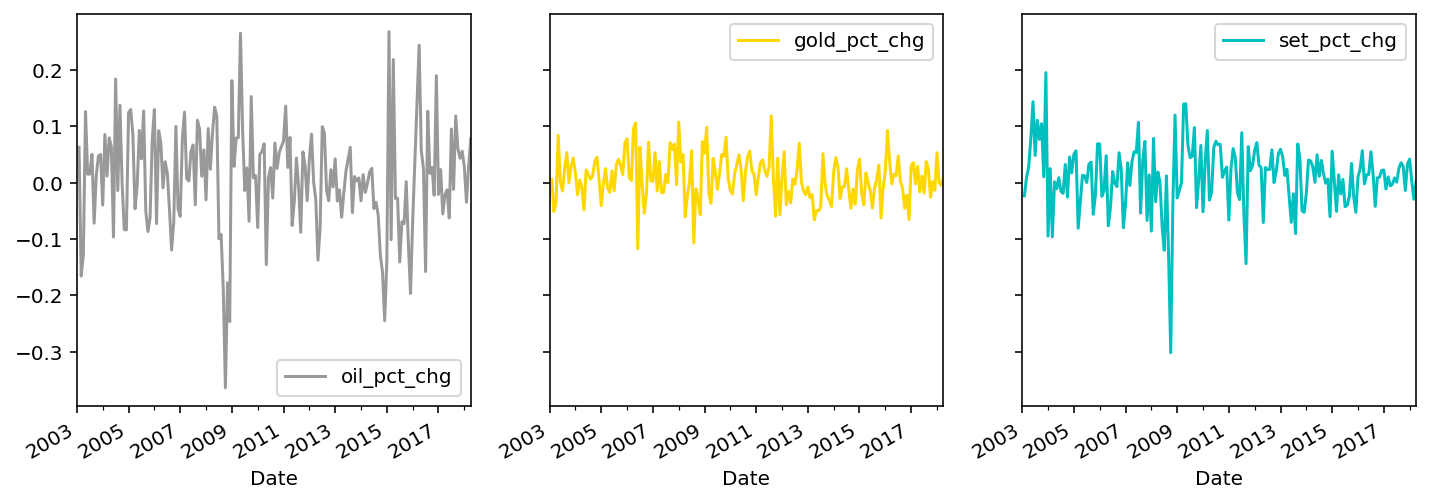

In [16]:
df[cols].plot(kind='line',subplots=True, 
              sharey=True, 
              figsize=(12, 4), 
              layout=(1, 3), 
              color=color);

## คำนวณ % การเปลี่ยนแปลงเทียบกับวันที่กำหนดเป็นฐาน

In [35]:
base_date = '2003-01-31'

In [32]:
df['Oil'].at[base_date]
# df['Gold'].at[base_date]
# df['SET'].at[base_date]

28.68

In [34]:
# df['Oil'].at[base_date]
df['Gold'].at[base_date]
# df['SET'].at[base_date]

413.788

In [20]:
df['oil_pct_diff'] = df['Oil'] / df['Oil'].at[base_date] - 1
df['gold_pct_diff'] = df['Gold'] / df['Gold'].at[base_date] - 1
df['set_pct_diff'] = df['SET'] / df['SET'].at[base_date] - 1
df

,Oil,Gold,SET,oil_pct_chg,gold_pct_chg,set_pct_chg,oil_pct_diff,gold_pct_diff,set_pct_diff
Date,,,,,,,,,
2003-01-31,30.71,356.859,370.01,NaN,NaN,NaN,0.000000,0.000000,0.000000
2003-02-28,32.63,358.970,361.32,0.062520,0.005916,-0.023486,0.062520,0.005916,-0.023486
2003-03-31,27.22,340.550,364.55,-0.165798,-0.051313,0.008939,-0.113644,-0.045702,-0.014756
2003-04-30,23.72,328.180,374.63,-0.128582,-0.036324,0.027651,-0.227613,-0.080365,0.012486
2003-05-31,26.71,355.683,403.82,0.126054,0.083805,0.077917,-0.130251,-0.003295,0.091376
...,...,...,...,...,...,...,...,...,...
2017-12-31,64.47,1264.450,1753.71,0.055847,-0.013613,0.033180,1.099316,2.543276,3.739629
2018-01-31,66.28,1331.300,1826.86,0.028075,0.052869,0.041712,1.158255,2.730605,3.937326
2018-02-28,63.97,1330.730,1830.13,-0.034852,-0.000428,0.001790,1.083035,2.729008,3.946164


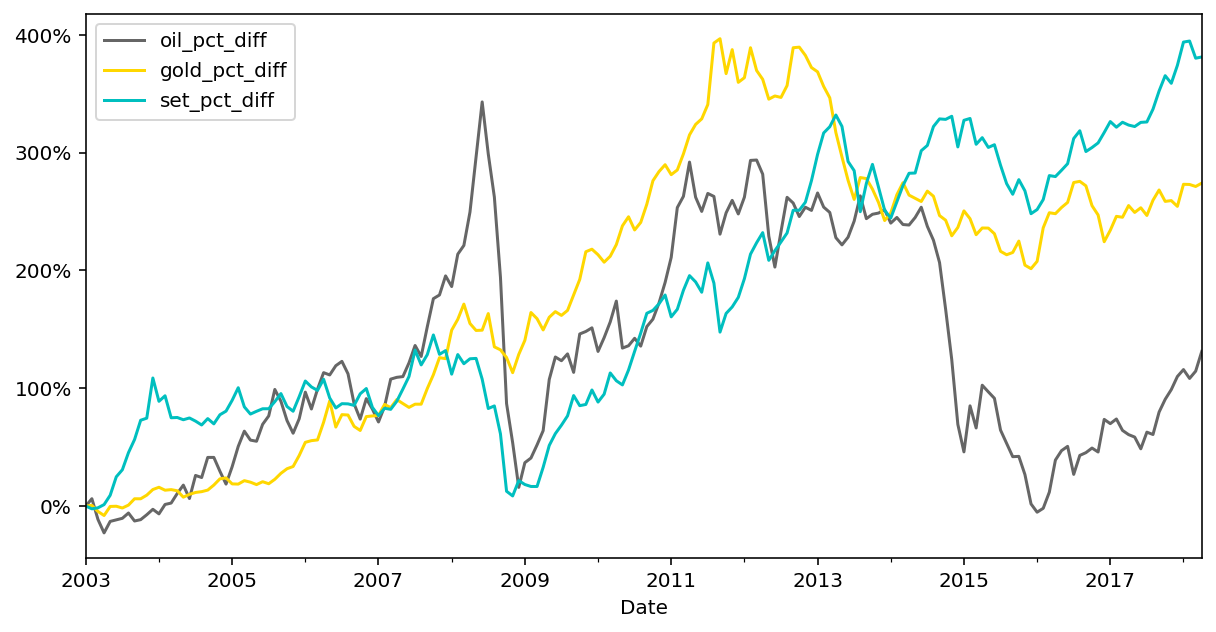

In [21]:
ax = df.loc[base_date:, ['oil_pct_diff', 'gold_pct_diff', 'set_pct_diff']].plot(kind='line', 
                                         figsize=(10,5),
                                         color=['.4', 'gold', 'c'])
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}%".format(v * 100)));